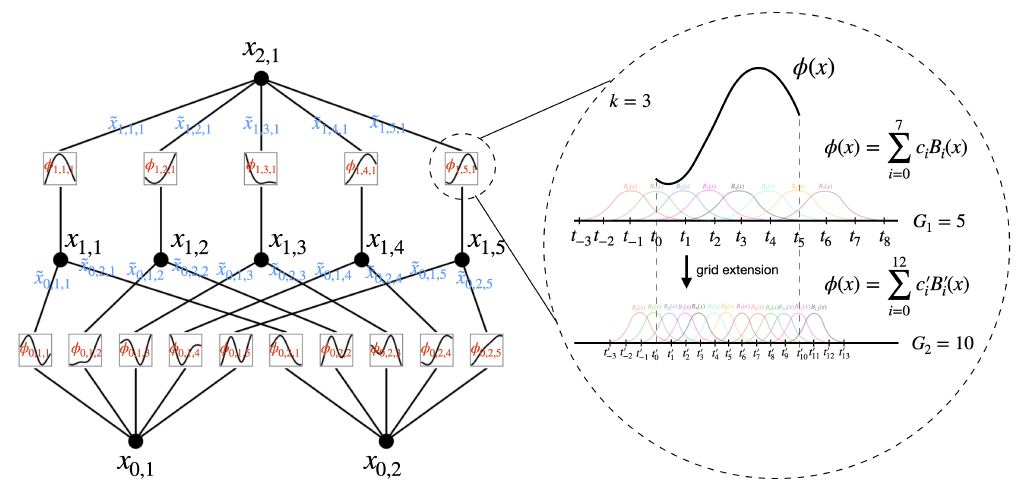!

# Kolmogorov-Arnold Networks for Regression case

# Information

- This notebook intented for implementation of KAN(Kolmogorov-Arnold Networks) on regression case.
- Data is not optimized and all hyperparameters of model are not checked not deep dived.
- This notebook aims to show the usage of KAN on regression cases and understanding of **Symbolic Regression**. For symbolic regression check it out => https://kindxiaoming.github.io/pykan/Examples/Example_4_symbolic_regression.html

For more information => https://www.linkedin.com/pulse/kolmogorov-arnold-networks-kan-novel-approach-neural-network-karaka%25C5%259F-5uzsf/?trackingId=upcjYlhgRkqxm%2FgwAG%2Fm8Q%3D%3D

For binary classificaiton implementation with KAN => https://www.kaggle.com/code/seyidcemkarakas/kan-tabular-data-binary-classification

# Import Libraries

In [1]:
pip install git+https://github.com/KindXiaoming/pykan.git

  Cloning https://github.com/KindXiaoming/pykan.git to /tmp/pip-req-build-r6oma2ei
  Running command git clone --filter=blob:none --quiet https://github.com/KindXiaoming/pykan.git /tmp/pip-req-build-r6oma2ei
  Resolved https://github.com/KindXiaoming/pykan.git to commit 27b4640aeee010dabb34264e6c7d7272bcf130f8
  Preparing metadata (setup.py) ... done
  Created wheel for pykan: filename=pykan-0.0.5-py3-none-any.whl size=34114 sha256=e29e640bce570448a5bf464d8bd9175aa299cff2043fbe1aa7e71c0bff1b324c
  Stored in directory: /tmp/pip-ephem-wheel-cache-lyajfw2k/wheels/47/ca/5a/98124e020f3119f51c17f78738c621c140b7aa803b0feda76e
Successfully built pykan
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import torch
from kan import KAN

import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

/kaggle/input/iddddt/idt.csv
/kaggle/input/rcm0525/RCM-234-ln.csv
/kaggle/input/idt2024/ST-1245.csv
/kaggle/input/idt2024/ST-1245-ln.csv
/kaggle/input/20240525/ST-1245(1).csv
/kaggle/input/indistencenh2/indistenceNH2NO.csv
/kaggle/input/ssf-energy/Energy_ssf.csv


# Data Preparation

In [3]:
df = pd.read_csv("/kaggle/input/rcm0525/RCM-234-ln.csv")

In [4]:
df

,Y,1000/T,ln P,ln ?,X(H2),ln X(O2)
0,3.433987,0.942507,4.099332,-0.693147,0.00,-1.734599
1,2.821379,0.927214,4.090504,-0.693147,0.00,-1.734599
2,2.302585,0.909091,4.095178,-0.693147,0.00,-1.734599
3,1.791759,0.892857,4.095011,-0.693147,0.00,-1.734599
4,1.386294,0.877193,4.096010,-0.693147,0.00,-1.734599
...,...,...,...,...,...,...
149,2.874129,0.898893,3.402197,0.000000,0.25,-3.283681
150,3.923754,0.894126,3.404857,0.405465,0.25,-3.688879
151,3.484312,0.878179,3.403528,0.405465,0.25,-3.688879
152,3.182627,0.861230,3.405521,0.405465,0.25,-3.688879


In [5]:
target_column_name = "Y"

X = df[list(df.columns.drop([target_column_name]))]
y = df[target_column_name]

In [6]:
# Split whole data to train and remainings
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Split remainings data to val and test
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Covert data to torch tensor
train_input = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
train_label = torch.tensor(y_train.to_numpy()[:, None], dtype=torch.float32)
# val_input = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
# val_label = torch.tensor(y_val.to_numpy()[:, None], dtype=torch.float32)
test_input = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
test_label = torch.tensor(y_test.to_numpy()[:, None], dtype=torch.float32)

In [7]:
dataset = {
    'train_input': train_input,
    'train_label': train_label,
#     'val_input': val_input,
#     'val_label': val_label,
    'test_input': test_input,
    'test_label': test_label
}

# KAN model building (for regression)

- Here is 7 input nodes for 7 features
- Hidden layer contains 3 nodes
- Output layer contains only 1 node because of this is regression case (for binary it is 2)

- For **grid**, **k** and **steps** parameter check it ot I have explained ! => https://www.kaggle.com/code/seyidcemkarakas/kan-tabular-data-binary-classification

In [8]:
# Create KAN
model = KAN(width=[5,3,1], grid=3, k=3)
# 特征数a，每个特征神经元b，层数c。KAN(width=[a,b,c]),
#  创建一个 KAN：第一层是两个特征输入层节点（x, y），第二层是 5 个隐藏层节点，第三层是 1 个输出层节点 f(x, y)，k = 3 代表选择三次样条曲线，grid = 5 代表网格点为 5
# Train KAN
results = model.train({'train_input': train_input, 'train_label': train_label, 'test_input': test_input, 'test_label': test_label},
                      opt="LBFGS", steps=30, loss_fn=torch.nn.L1Loss()) 

train loss: 3.39e-01 | test loss: 4.44e-01 | reg: 2.19e+01 : 100%|██| 30/30 [00:14<00:00,  2.11it/s]


# Predictions

In [9]:
# Predictions of train val and test datasets
test_preds = model.forward(test_input).detach()
test_labels = test_label

train_preds = model.forward(train_input).detach()
train_labels = train_label

# val_preds = model.forward(val_input).detach()
# val_labels = val_label


# Evaluate metrics
print("Train R2 Score:", r2_score(train_labels.numpy(), train_preds.numpy()))
print("Train MAE:", mean_absolute_error(train_labels.numpy(), train_preds.numpy()))

# print("Val R2 Score:", r2_score(val_labels.numpy(), val_preds.numpy()))
# print("Val MAE:", mean_absolute_error(val_labels.numpy(), val_preds.numpy()))

print("Test R2 Score:", r2_score(test_labels.numpy(), test_preds.numpy()))
print("Test MAE:", mean_absolute_error(test_labels.numpy(), test_preds.numpy()))

Train R2 Score: 0.9723872510410364
Train MAE: 0.11487189
Test R2 Score: 0.8772755110247331
Test MAE: 0.19727653


- **model.prune()** works like **Dropout()** in MLP, you can try it out, not used in this notebook

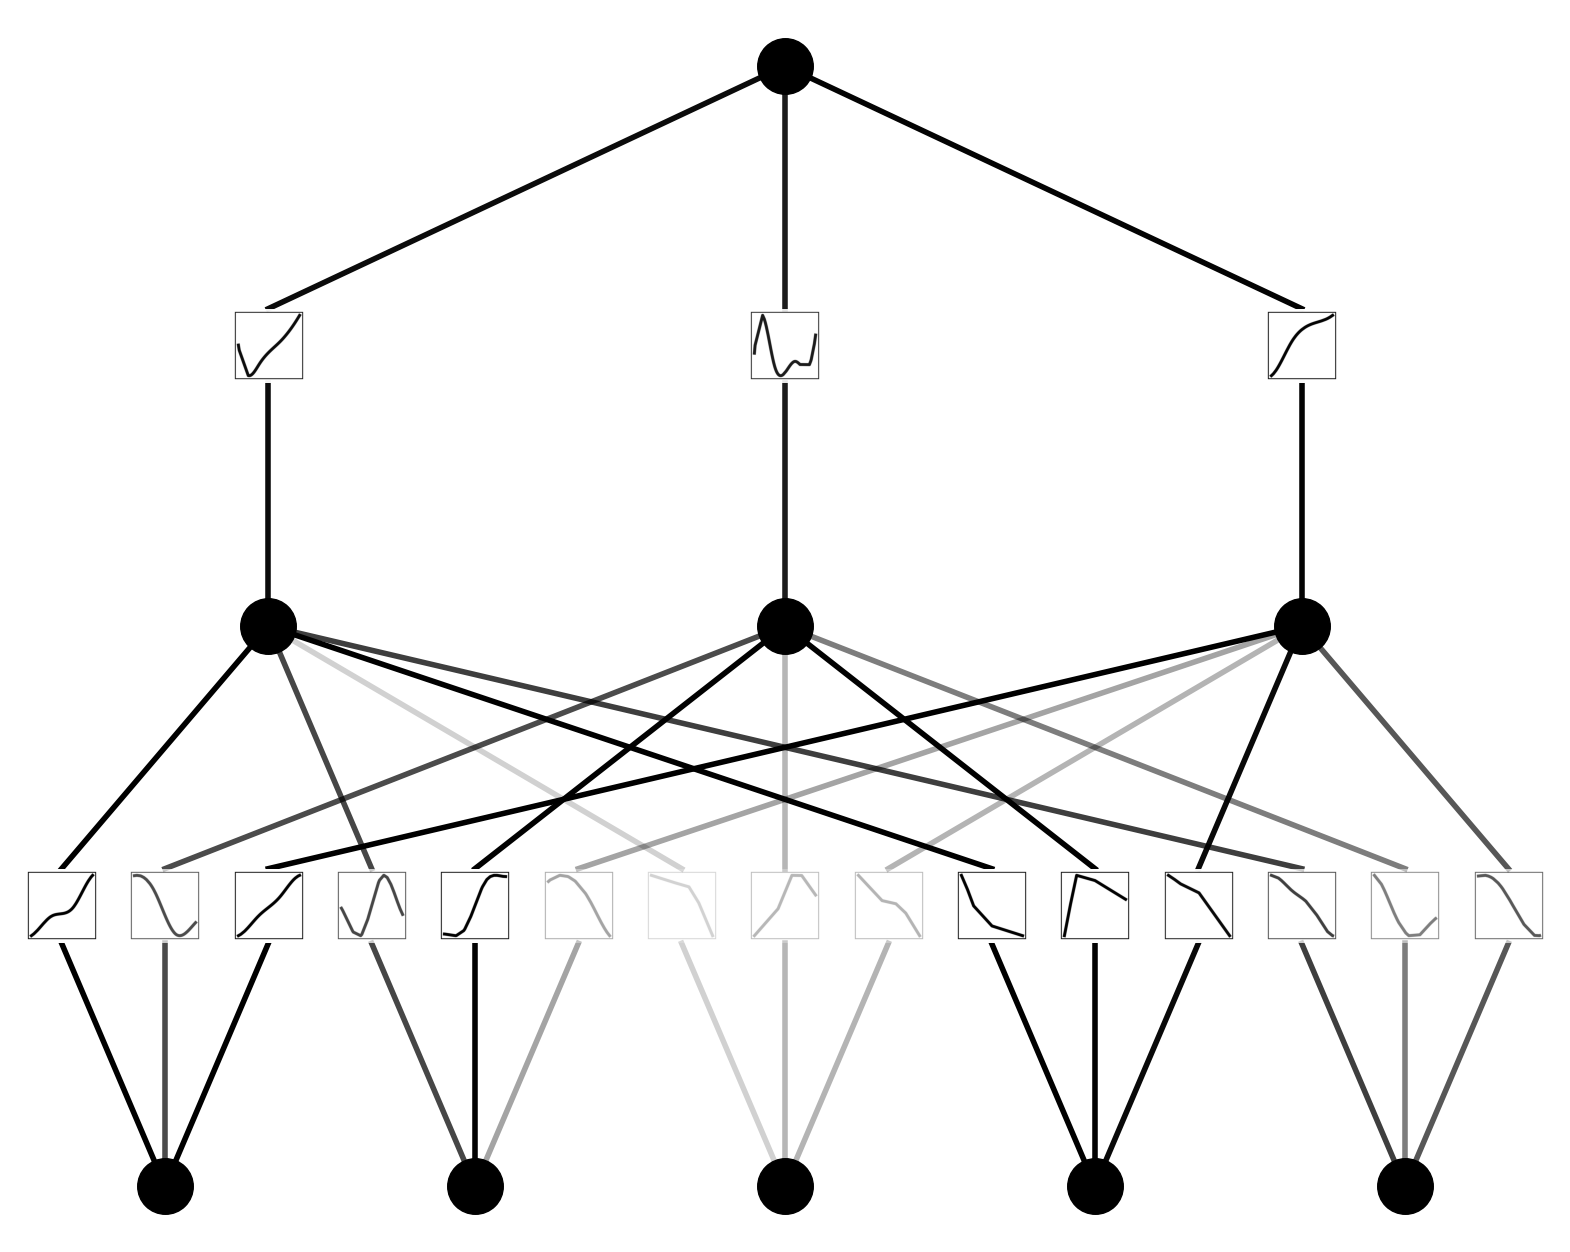

In [10]:
#model.prune()
model.plot(scale=2)

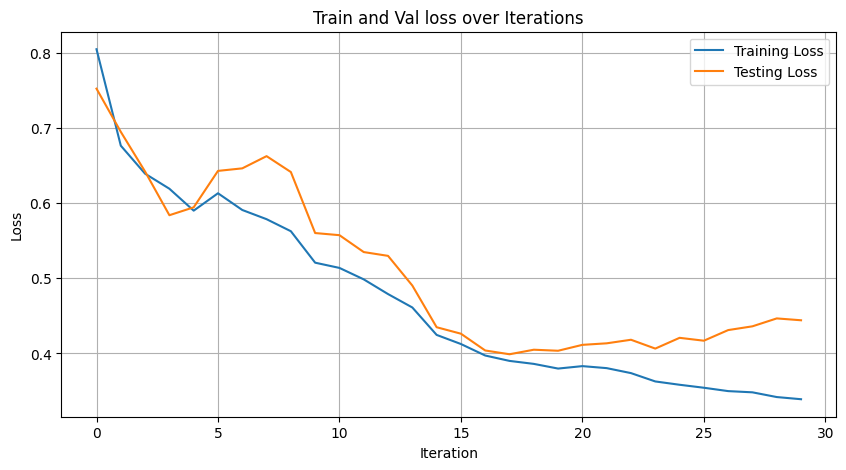

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(results["train_loss"], label='Training Loss')
plt.plot(results["test_loss"], label='Testing Loss')
plt.title('Train and Val loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Symbolic Formulation

- Thus this is regression case, some of the users maybe want formulation of this model in order to see how model predicts
- This can be analyzed via **symbolic formulation**
- This process has good and bad norms:

1) Good: Approximate symbolic formulas can fit the data well within some tolerances and provide useful insights in some cases.

2) Bad: Exact and accurate formulas are difficult to find, especially when model generalization or precise calculations are required.

Also you can check it out this tutorial => https://kindxiaoming.github.io/pykan/Examples/Example_4_symbolic_regression.html

Here is related issue about appx. formulation's performance where also author of KAN replied => https://github.com/KindXiaoming/pykan/issues/111

- In this step, you add various functions to the **lib** parameter and enable your KAN model to perform symbolic regression using these functions.

In [12]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
# lib = ['sin']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with log, r2=0.9404163956642151
fixing (0,0,1) with sin, r2=0.995892345905304
fixing (0,0,2) with sqrt, r2=0.9952313303947449
fixing (0,1,0) with sin, r2=0.9900636672973633
fixing (0,1,1) with sin, r2=0.9963724613189697
fixing (0,1,2) with sin, r2=0.999477207660675
fixing (0,2,0) with x^3, r2=0.9951061606407166
fixing (0,2,1) with sin, r2=0.9982913732528687
fixing (0,2,2) with x^3, r2=0.9940892457962036
fixing (0,3,0) with tanh, r2=0.9977167844772339
fixing (0,3,1) with x^4, r2=0.9591192007064819
fixing (0,3,2) with sqrt, r2=0.9975729584693909
fixing (0,4,0) with tanh, r2=0.998367190361023
fixing (0,4,1) with sin, r2=0.9930375218391418
fixing (0,4,2) with sin, r2=0.9996023774147034
fixing (1,0,0) with abs, r2=0.9771385788917542
fixing (1,1,0) with tanh, r2=0.7757084369659424
fixing (1,2,0) with tanh, r2=0.9985684752464294


In [13]:
formula = sp.sympify(str(model.symbolic_formula()[0][0]))

- Here is our **symbolic formula**

In [14]:
formula

3.28*tanh(0.69*(0.16 - x_3)**3 + 1.53*sqrt(0.5 - x_4) - 13.53*sqrt(1 - 0.66*x_1) + 0.28*sin(1.47*x_2 - 9.2) - 0.82*sin(1.78*x_5 - 1.64) + 7.74) + 0.86*tanh(1328.78*(0.28 - x_4)**4 + 1.21*sin(10.0*x_1 - 8.8) - 3.11*sin(2.78*x_2 + 2.84) - 1.7*sin(2.72*x_3 - 6.39) + 4.53*sin(1.75*x_5 + 5.68) - 9.0) + 0.18*Abs(-1.85*(-x_3 - 0.08)**3 + 5.97*log(4.2 - 3.57*x_1) + 4.1*sin(4.18*x_2 + 7.48) + 22.71*tanh(4.67*x_4 + 0.19) + 23.62*tanh(0.45*x_5 + 0.6) - 6.57) + 1.0

- Below **kan_symbolic_formula_prediction** fuction is intented for getting result for symbolic formula

In [15]:
def kan_symbolic_formula_prediction(formula, X):
    batch = X.shape[0]
    predictions = []  # Empty list for keeping predictions

    for i in range(batch):
        # Evaluation on symbolic formula on every single fow
        expression = formula
        for j in range(X.shape[1]):
            expression = expression.subs(f'x_{j+1}', X[i, j])
        
        # Get output of formula
        predicted = float(expression.evalf())
        
        predictions.append(predicted)
    
    return predictions

In [16]:
# Get results using symbolic formula
preds_from_kan_formula = kan_symbolic_formula_prediction(formula, X_train.to_numpy())

In [17]:
print("MAE from formula on train data",mean_absolute_error(train_labels.numpy(),preds_from_kan_formula))
print("R2 from formula on train data",r2_score(train_labels.numpy(), preds_from_kan_formula))

MAE from formula on train data 0.3201359683302842
R2 from formula on train data 0.845565919942895


In [18]:
print("MAE from model.forward() on train data",mean_absolute_error(train_labels.numpy(), train_preds.numpy()))
print("R2 from model.forward() on train data",r2_score(train_labels.numpy(), train_preds.numpy()))

MAE from model.forward() on train data 0.11487189
R2 from model.forward() on train data 0.9723872510410364


- As you see form metrics our symbolic formula doesnt perform well and it is not necessery to be.
- If metrics gets bad when using auto_symbolic and predictions made with model.forward produce better results, then this **indicates that symbolic formulas cannot fully capture the complexity of the model** and the nuances in the data. Therefore, it is important to carefully evaluate symbolic regression results and conduct extensive testing before using them.
- You can get more information about this section => https://kindxiaoming.github.io/pykan/Examples/Example_4_symbolic_regression.html

In [19]:
train_labels

tensor([[1.8405],
        [4.3713],
        [4.9866],
        [3.3464],
        [1.7579],
        [4.4302],
        [3.2280],
        [3.3464],
        [4.4431],
        [2.8232],
        [1.2809],
        [2.8094],
        [1.6487],
        [3.6889],
        [3.2367],
        [2.2192],
        [2.3026],
        [2.7498],
        [2.3795],
        [3.8704],
        [3.5610],
        [1.3863],
        [3.2741],
        [3.4557],
        [4.4516],
        [0.4700],
        [2.2618],
        [2.7985],
        [3.1442],
        [2.1282],
        [4.5098],
        [3.9371],
        [3.1826],
        [3.1510],
        [2.1748],
        [4.0509],
        [2.6247],
        [4.2160],
        [3.0436],
        [2.3418],
        [2.7600],
        [3.5553],
        [2.0541],
        [4.1115],
        [2.6665],
        [1.3863],
        [2.6247],
        [1.3863],
        [1.0296],
        [1.7918],
        [2.8362],
        [2.1041],
        [2.6247],
        [2.0281],
        [3.3631],
        [3

In [20]:
train_preds

tensor([[1.9548],
        [4.1044],
        [4.8839],
        [3.0788],
        [1.7688],
        [4.8166],
        [3.2430],
        [3.3491],
        [4.4386],
        [2.8317],
        [1.3907],
        [2.6554],
        [1.7077],
        [3.7106],
        [3.1678],
        [2.5047],
        [2.2919],
        [2.6387],
        [2.6334],
        [3.8746],
        [3.5138],
        [1.1437],
        [3.2743],
        [3.4924],
        [4.5942],
        [0.3352],
        [2.2664],
        [2.7986],
        [3.0828],
        [2.1997],
        [4.4854],
        [3.6767],
        [3.2113],
        [3.3856],
        [2.2342],
        [4.0455],
        [2.5140],
        [4.2888],
        [2.8413],
        [2.3736],
        [2.7366],
        [3.2855],
        [2.0413],
        [4.1713],
        [2.6635],
        [1.6373],
        [2.7306],
        [1.3588],
        [0.8664],
        [1.8363],
        [3.0900],
        [2.2016],
        [2.5547],
        [2.0248],
        [3.2397],
        [3